In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Data Generation

In [13]:
X1 = np.random.multivariate_normal([3,2] , [[1,2],[2,1]] , size = 200) #mean , covariance , size
X2 = np.random.multivariate_normal([7,9] , [[1,3],[3,1]] , size = 200) #mean , covariance , size

# we are creating cluster here
y1 = np.ones((200,))
y2 = np.zeros((200,))
print(X1.shape , X2.shape , y1.shape, y2.shape)

X = np.concatenate([X1,X2] , axis =0)
y = np.concatenate([y1,y2] , axis = 0)

print(X.shape , y.shape)

ix = np.arange(0 , len(X))
np.random.shuffle(ix)

X = X[ix]         # we did index based shuffling
y = y[ix]

(200, 2) (200, 2) (200,) (200,)
(400, 2) (400,)


C:\Users\SUBHAJ~1\AppData\Local\Temp/ipykernel_9764/4109706380.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal([3,2] , [[1,2],[2,1]] , size = 200) #mean , covariance , size
C:\Users\SUBHAJ~1\AppData\Local\Temp/ipykernel_9764/4109706380.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal([7,9] , [[1,3],[3,1]] , size = 200) #mean , covariance , size


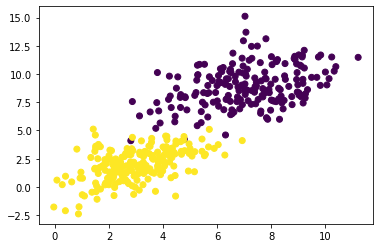

In [14]:
plt.scatter(X[:,0] , X[:,1] , c=y )
plt.show()

In [15]:
class LogisticRegression:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return self.sigmoid(X.dot(self.w))
    
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    def loss(self, ytrue, ypred):
        return -(ytrue*np.log(ypred + 1e-7) + (1-ytrue)*np.log(1-ypred+1e-7)).sum()
    
    def accuracy(self, ytrue, ypred):
         return (ytrue == (ypred > 0.5).astype('int')).mean()
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            acc = self.accuracy(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, accuracy: {acc}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)

In [16]:
logr = LogisticRegression()
losses = logr.fit(X, y.reshape(-1,1), epochs=300, learning_rate=0.01, method='batch')

Epoch: 1/300 Loss: 3096.072638436995, accuracy: 0.51, SoR: 195.67016147008047
Epoch: 2/300 Loss: 3009.02743359622, accuracy: 0.5175, SoR: 192.9453442910971
Epoch: 3/300 Loss: 2354.533894401386, accuracy: 0.5475, SoR: 179.26709247847367
Epoch: 4/300 Loss: 676.6811095654772, accuracy: 0.75, SoR: -78.76368826050108
Epoch: 5/300 Loss: 2644.244488558937, accuracy: 0.54, SoR: 183.91841339915283
Epoch: 6/300 Loss: 525.5462303497037, accuracy: 0.79, SoR: 82.34700153808554
Epoch: 7/300 Loss: 1584.55983721819, accuracy: 0.6125, SoR: -140.02817589174407
Epoch: 8/300 Loss: 2861.805969201473, accuracy: 0.5325, SoR: 187.91886552186736
Epoch: 9/300 Loss: 2143.4383838195236, accuracy: 0.595, SoR: 162.1110812350393
Epoch: 10/300 Loss: 256.27579813750634, accuracy: 0.9, SoR: 32.496445283602384
Epoch: 11/300 Loss: 347.51396562080276, accuracy: 0.8625, SoR: -22.144000381860806
Epoch: 12/300 Loss: 843.4587933937232, accuracy: 0.7575, SoR: 98.44959885874403
Epoch: 13/300 Loss: 853.0719669518933, accuracy: 0

In [11]:
print(y)

[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1.]


In [9]:
## we need to shuffle the y
ix = np.arange(0 , len(X))
print(ix)
np.random.shuffle(ix)
print(ix)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[ 93 149 165 184 176 162 136  62 107  97  17   3  84   0  15 140 125  44
  60  78  30 181  28  29   6 189  83 167  38  47  79 164 129  87 114  39
  49 137 156  55 179 159  31  99  81 113 